# Deep Neural Network acrchitecture

Purpose: Create DNN architecture.

Author: Gabriel Rodrigues Palma and Rafael de Andrade Moral

In [89]:
# visualisation modules
import matplotlib.pyplot as plt

# Data manipulation modules
import numpy as np
import pandas as pd

# Machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Deep learning modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import LeakyReLU

# Machine learning packages
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import collections
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelBinarizer

# Additional packages
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Conv2DTranspose, UpSampling2D, Flatten, Reshape
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import L1
#from scikeras.wrappers import KerasClassifier
from keras import metrics
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf

# Testing GPU from MacOs
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


# Functions used in the project

In [3]:
def create_dataset(path, response_class):
    ''' This function reads and prepare the datasets for applying the ML and DL methods'''
    data = pd.read_csv(path)
    data = data.drop(columns = ['Unnamed: 0', 'Subject'])
    explanatory_variables = data.drop(columns = response_class)
    response_variables = data[response_class]        
    binarizer = LabelBinarizer()
    response_variables = binarizer.fit_transform(response_variables)
    
    onehot_encoder = OneHotEncoder(sparse=False)
    hot_encode_response_variable = onehot_encoder.fit_transform(np.array(response_variables).reshape(-1, 1))          
    
    return(explanatory_variables, 
           hot_encode_response_variable, response_variables)

# Importing Datasets

Before obtaining the performance of the learning algorithms selected for this paper, we need to import the datasets related to the Hidden Markov Models features and the peak features.

## Minmax scale Midline EEG data Trial 1

In [5]:
all_Minmax_scale_explanatory_variables_t1, \
  all_Minmax_scale_hot_encode_response_variable_t1, all_Minmax_scale_response_variable_t1 = create_dataset(path = '../../../output_data/New_data/SplitDatasets/MinmaxscaleTrial1.csv', 
                                                                                           response_class = 'features_class')

In [6]:
all_Minmax_scale_explanatory_variables_t1.head()

,MM_Intercept,MM_Hess,average_peak_magnitude,average_peak_curvature,hmm2_mean.1,hmm2_mean.2,hmm2_sd.1,hmm2_sd.2,hmm2_p1,hmm2_p2,...,hmm5_sd.1,hmm5_sd.2,hmm5_sd.3,hmm5_sd.4,hmm5_sd.5,hmm5_p1,hmm5_p2,hmm5_p3,hmm5_p4,hmm5_p5
0,0.052283,-10.740852,0.329249,-0.000296,0.348,0.216,0.065,0.037,0.515900,0.484100,...,0.011,0.058,0.016,0.024,0.012,0.180843,0.240996,0.243103,0.144828,0.190230
1,0.052178,-10.722025,0.340976,-0.000324,0.209,0.364,0.048,0.092,0.530876,0.469124,...,0.112,0.016,0.023,0.026,0.015,0.156503,0.214782,0.282709,0.138557,0.207449
2,-0.030231,6.213944,0.230614,-0.000272,0.269,0.147,0.064,0.032,0.404959,0.595041,...,0.018,0.016,0.060,0.010,0.009,0.229291,0.181818,0.179896,0.210456,0.198539
3,-0.000309,0.064725,0.239325,-0.000217,0.264,0.155,0.045,0.034,0.440678,0.559322,...,0.011,0.036,0.014,0.009,0.022,0.190485,0.208398,0.214176,0.224576,0.162365
4,0.094943,-19.507132,0.403699,-0.000361,0.275,0.459,0.053,0.082,0.627565,0.372435,...,0.024,0.075,0.028,0.015,0.014,0.237708,0.252226,0.111692,0.255517,0.142857


## Minmax scale Midline EEG data Trial 12

In [76]:
all_Minmax_scale_explanatory_variables_t12, \
  all_Minmax_scale_hot_encode_response_variable_t12, all_Minmax_scale_response_variable_t12 = create_dataset(path = '../../../output_data/New_data/SplitDatasets/MinmaxscaleTrial1.csv', 
                                                                                           response_class = 'features_class')

In [9]:
all_Minmax_scale_explanatory_variables_t12.head()

,MM_Intercept,MM_Hess,average_peak_magnitude,average_peak_curvature,hmm2_mean.1,hmm2_mean.2,hmm2_sd.1,hmm2_sd.2,hmm2_p1,hmm2_p2,...,hmm5_sd.1,hmm5_sd.2,hmm5_sd.3,hmm5_sd.4,hmm5_sd.5,hmm5_p1,hmm5_p2,hmm5_p3,hmm5_p4,hmm5_p5
0,0.061130,0.705040,0.372955,-0.000386,0.394,0.253,0.073,0.048,0.315457,0.684543,...,0.017,0.008,0.028,0.014,0.067,0.194532,0.219769,0.256572,0.170347,0.158780
1,0.020163,-88.391867,0.351785,-0.000365,0.224,0.442,0.029,0.149,0.590447,0.409553,...,0.010,0.014,0.008,0.044,0.153,0.149390,0.257114,0.183943,0.295732,0.113821
2,-0.044913,-101.184206,0.212457,-0.000230,0.126,0.261,0.022,0.090,0.470644,0.529356,...,0.016,0.004,0.007,0.026,0.091,0.129735,0.188447,0.133523,0.357008,0.191288
3,-0.001816,-48.016730,0.266135,-0.000272,0.308,0.171,0.059,0.031,0.423729,0.576271,...,0.006,0.013,0.009,0.026,0.048,0.095450,0.329170,0.116860,0.266726,0.191793
4,0.037201,-95.792486,0.377899,-0.000374,0.418,0.236,0.080,0.059,0.412071,0.587929,...,0.022,0.026,0.007,0.011,0.068,0.262227,0.234131,0.123829,0.138398,0.241415


In [25]:
all_Minmax_scale_explanatory_variables_t12.shape

(47, 46)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(all_Minmax_scale_explanatory_variables_t12, 
                                                    all_Minmax_scale_response_variable_t12, 
                                                    test_size = 0.5, random_state = 42)

In [56]:
X_train.shape

(23, 46)

# Obtaining DNN performance with proposed data

In [86]:
model = Sequential()
model.add(Dense(100, input_shape=(46,)))
model.add(Dense(150, activation = LeakyReLU(alpha=0.4)))
model.add(Dense(200, activation = LeakyReLU(alpha=0.4)))
model.add(Dense(150, activation = LeakyReLU(alpha=0.4)))
model.add(Dense(46, activation = LeakyReLU(alpha=0.4)))
model.add(Dense(20, activation = LeakyReLU(alpha=0.4)))
model.add(Dense(10, activation = LeakyReLU(alpha=0.4)))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', 
              loss = 'mse', 
             metrics = ['accuracy', 'TruePositives', 'FalsePositives', 'FalseNegatives', 'TrueNegatives'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 100)               4700      
                                                                 
 dense_101 (Dense)           (None, 150)               15150     
                                                                 
 dense_102 (Dense)           (None, 200)               30200     
                                                                 
 dense_103 (Dense)           (None, 150)               30150     
                                                                 
 dense_104 (Dense)           (None, 46)                6946      
                                                                 
 dense_105 (Dense)           (None, 20)                940       
                                                                 
 dense_106 (Dense)           (None, 10)              

In [87]:
model.fit(X_train, y_train, batch_size = 10,
          validation_data = (X_test, y_test), epochs=100, verbose = False)

2023-04-03 19:30:58.909447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 19:31:00.158052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


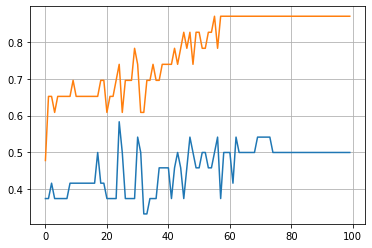

In [88]:
plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['accuracy'])
plt.grid()
plt.show()

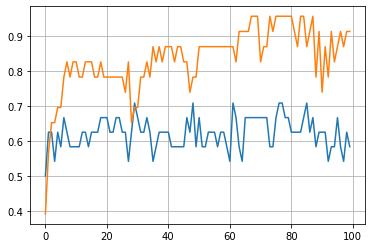

In [74]:
plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['accuracy'])
plt.grid()
plt.show()

In [33]:
model.save('DNN_model_params.h5')

# Model with HMM data

In [10]:
explanatory_variables, hot_encode_response_variable, response_variables = create_dataset('../output_data/hmm_features.csv')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(explanatory_variables, 
                                                    response_variables, 
                                                    test_size = 0.3, random_state = 42)

In [12]:
X_train.shape

(35, 42)

In [13]:
model = Sequential()
model.add(Dense(30, input_shape=(42,)))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', 
              loss = 'mse', 
             metrics = ['accuracy', 'TruePositives', 'FalsePositives', 'FalseNegatives', 'TrueNegatives'])
model.summary()

2022-12-07 01:39:02.600291: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-07 01:39:02.601834: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1290      
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 15)                315       
                                                                 
 dense_3 (Dense)             (None, 10)                160       
                                                                 
 dense_4 (Dense)             (None, 3)                 33        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 2,422
Traina

In [14]:
model.fit(X_train, y_train, batch_size = 10,
          validation_data = (X_test, y_test), epochs=100)

Epoch 1/100


2022-12-07 01:39:11.131401: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-07 01:39:11.808113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 3s 270ms/step - loss: 0.2488 - accuracy: 0.5143 - true_positives: 17.0000 - false_positives: 17.0000 - false_negatives: 0.0000e+00 - true_negatives: 1.0000 - val_loss: 0.2545 - val_accuracy: 0.4667 - val_true_positives: 7.0000 - val_false_positives: 7.0000 - val_false_negatives: 1.0000 - val_true_negatives: 0.0000e+00
Epoch 2/100
1/4 [======>.......................] - ETA: 0s - loss: 0.2423 - accuracy: 0.7000 - true_positives: 5.0000 - false_positives: 3.0000 - false_negatives: 0.0000e+00 - true_negatives: 2.0000

2022-12-07 01:39:13.780996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 32ms/step - loss: 0.2457 - accuracy: 0.5429 - true_positives: 17.0000 - false_positives: 16.0000 - false_negatives: 0.0000e+00 - true_negatives: 2.0000 - val_loss: 0.2532 - val_accuracy: 0.4667 - val_true_positives: 7.0000 - val_false_positives: 7.0000 - val_false_negatives: 1.0000 - val_true_negatives: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 31ms/step - loss: 0.2435 - accuracy: 0.5714 - true_positives: 17.0000 - false_positives: 15.0000 - false_negatives: 0.0000e+00 - true_negatives: 3.0000 - val_loss: 0.2529 - val_accuracy: 0.4667 - val_true_positives: 7.0000 - val_false_positives: 7.0000 - val_false_negatives: 1.0000 - val_true_negatives: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 26ms/step - loss: 0.2415 - accuracy: 0.5714 - true_positives: 17.0000 - false_positives: 15.0000 - false_negatives: 0.0000e+00 - true_negatives: 3.0000 - val_loss: 0.2517 - val_accuracy: 0.6000 - val_true_positives: 8.

4/4 [==============================] - 0s 27ms/step - loss: 0.0594 - accuracy: 0.9714 - true_positives: 16.0000 - false_positives: 0.0000e+00 - false_negatives: 1.0000 - true_negatives: 18.0000 - val_loss: 0.2743 - val_accuracy: 0.6667 - val_true_positives: 5.0000 - val_false_positives: 2.0000 - val_false_negatives: 3.0000 - val_true_negatives: 5.0000
Epoch 47/100
4/4 [==============================] - 0s 29ms/step - loss: 0.0534 - accuracy: 0.9714 - true_positives: 16.0000 - false_positives: 0.0000e+00 - false_negatives: 1.0000 - true_negatives: 18.0000 - val_loss: 0.2737 - val_accuracy: 0.6667 - val_true_positives: 5.0000 - val_false_positives: 2.0000 - val_false_negatives: 3.0000 - val_true_negatives: 5.0000
Epoch 48/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0430 - accuracy: 0.9714 - true_positives: 16.0000 - false_positives: 0.0000e+00 - false_negatives: 1.0000 - true_negatives: 18.0000 - val_loss: 0.2755 - val_accuracy: 0.6667 - val_true_positives: 5.0000 -

4/4 [==============================] - 0s 27ms/step - loss: 9.6345e-04 - accuracy: 1.0000 - true_positives: 17.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - true_negatives: 18.0000 - val_loss: 0.3265 - val_accuracy: 0.6667 - val_true_positives: 5.0000 - val_false_positives: 2.0000 - val_false_negatives: 3.0000 - val_true_negatives: 5.0000
Epoch 91/100
4/4 [==============================] - 0s 23ms/step - loss: 9.2243e-04 - accuracy: 1.0000 - true_positives: 17.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - true_negatives: 18.0000 - val_loss: 0.3273 - val_accuracy: 0.6667 - val_true_positives: 5.0000 - val_false_positives: 2.0000 - val_false_negatives: 3.0000 - val_true_negatives: 5.0000
Epoch 92/100
4/4 [==============================] - 0s 28ms/step - loss: 8.9349e-04 - accuracy: 1.0000 - true_positives: 17.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - true_negatives: 18.0000 - val_loss: 0.3285 - val_accuracy: 0.6667 - val_

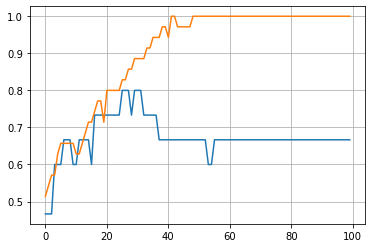

In [15]:
plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['accuracy'])
plt.grid()
plt.show()

In [16]:
model.save('DNN_model_hmm.h5')

# Combined data

In [17]:
explanatory_variables, hot_encode_response_variable, response_variables = create_dataset('../output_data/finaldata.csv')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(explanatory_variables, 
                                                    response_variables, 
                                                    test_size = 0.3, random_state = 42)

In [19]:
X_train.shape

(29, 44)

In [20]:
model = Sequential()
model.add(Dense(30, input_shape=(44,)))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', 
              loss = 'mse', 
             metrics = ['accuracy', 'TruePositives', 'FalsePositives', 'FalseNegatives', 'TrueNegatives'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                1350      
                                                                 
 dense_7 (Dense)             (None, 20)                620       
                                                                 
 dense_8 (Dense)             (None, 15)                315       
                                                                 
 dense_9 (Dense)             (None, 10)                160       
                                                                 
 dense_10 (Dense)            (None, 3)                 33        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 2,482
Trainable params: 2,482
Non-traina

In [21]:
model.fit(X_train, y_train, batch_size = 10,
          validation_data = (X_test, y_test), epochs=100)

Epoch 1/100


2022-12-07 01:41:24.942710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 0.2423 - accuracy: 0.5862 - true_positives: 17.0000 - false_positives: 12.0000 - false_negatives: 0.0000e+00 - true_negatives: 0.0000e+00

2022-12-07 01:41:25.841675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 521ms/step - loss: 0.2423 - accuracy: 0.5862 - true_positives: 17.0000 - false_positives: 12.0000 - false_negatives: 0.0000e+00 - true_negatives: 0.0000e+00 - val_loss: 0.2371 - val_accuracy: 0.6154 - val_true_positives: 8.0000 - val_false_positives: 5.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 39ms/step - loss: 0.2375 - accuracy: 0.5862 - true_positives: 17.0000 - false_positives: 12.0000 - false_negatives: 0.0000e+00 - true_negatives: 0.0000e+00 - val_loss: 0.2344 - val_accuracy: 0.6154 - val_true_positives: 8.0000 - val_false_positives: 5.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 38ms/step - loss: 0.2338 - accuracy: 0.5862 - true_positives: 17.0000 - false_positives: 12.0000 - false_negatives: 0.0000e+00 - true_negatives: 0.0000e+00 - val_loss: 0.2328 - val_accuracy: 0.6154 - v

Epoch 23/100
3/3 [==============================] - 0s 36ms/step - loss: 0.1763 - accuracy: 0.6207 - true_positives: 17.0000 - false_positives: 11.0000 - false_negatives: 0.0000e+00 - true_negatives: 1.0000 - val_loss: 0.2021 - val_accuracy: 0.6154 - val_true_positives: 8.0000 - val_false_positives: 5.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 0.0000e+00
Epoch 24/100
3/3 [==============================] - 0s 23ms/step - loss: 0.1727 - accuracy: 0.6207 - true_positives: 17.0000 - false_positives: 11.0000 - false_negatives: 0.0000e+00 - true_negatives: 1.0000 - val_loss: 0.2006 - val_accuracy: 0.6154 - val_true_positives: 8.0000 - val_false_positives: 5.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 0.0000e+00
Epoch 25/100
3/3 [==============================] - 0s 34ms/step - loss: 0.1690 - accuracy: 0.6552 - true_positives: 17.0000 - false_positives: 10.0000 - false_negatives: 0.0000e+00 - true_negatives: 2.0000 - val_loss: 0.1990 - val_accuracy: 0.6154 -

3/3 [==============================] - 0s 29ms/step - loss: 0.0495 - accuracy: 1.0000 - true_positives: 17.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - true_negatives: 12.0000 - val_loss: 0.2015 - val_accuracy: 0.6923 - val_true_positives: 7.0000 - val_false_positives: 3.0000 - val_false_negatives: 1.0000 - val_true_negatives: 2.0000
Epoch 68/100
3/3 [==============================] - 0s 34ms/step - loss: 0.0438 - accuracy: 1.0000 - true_positives: 17.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - true_negatives: 12.0000 - val_loss: 0.2031 - val_accuracy: 0.6154 - val_true_positives: 6.0000 - val_false_positives: 3.0000 - val_false_negatives: 2.0000 - val_true_negatives: 2.0000
Epoch 69/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0372 - accuracy: 1.0000 - true_positives: 17.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - true_negatives: 12.0000 - val_loss: 0.2031 - val_accuracy: 0.6923 - val_true_positiv

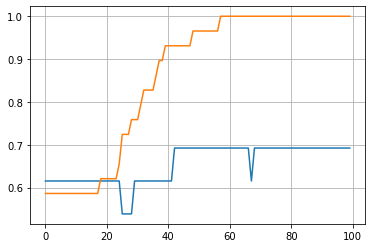

In [22]:
plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['accuracy'])
plt.grid()
plt.show()

In [23]:
model.save('DNN_model_fulldata.h5')